In [29]:
#Notebook used to plot measurements from the SkySim5000+IA mocks vs theory predictions
%pylab inline
import pylab as plt
import numpy as np
import treecorr
#import matplotlib as plt
#path_treecorr='correlations/'
path_treecorr='/global/homes/j/jharno/IA-infusion/SkySim5000/GalCat/StageIV_nz/V1/correlations/'
path_treecorr_HACCY1='/global/homes/j/jharno/IA-infusion/HACC-Y1/GalCat/StageIV_nz/V0/seed0/correlations/'
path_nicaea='theory/nicaea/'
path_cosmoSIS='theory/cosmoSIS/'

from astropy.io import fits

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [30]:
PlotIA=False

if(PlotIA):
    # Select IA model:
    IA_model=0  #NLA
    #IA_model=1 #delta-NLA
    #IA_model=2 #TATT
    #IA_model=3 #TATT no delta

    # Load the CCL predictions:
    if(IA_model==0):
        hdul = fits.open('theory/CCL/theo_prediction_1.0_0.0_0.0.fits')
    elif(IA_model==1):
        hdul = fits.open('theory/CCL/theo_prediction_1.0_1.0_0.0_V2.fits')
    elif(IA_model==2):
        hdul = fits.open('theory/CCL/theo_prediction_1.0_1.0_1.0.fits')       
    elif(IA_model==3):
        hdul = fits.open('theory/CCL/theo_prediction_0.0_0.0_1.0_V2.fits')       

    data=hdul[1].data
    NO_IA_plus_CCL=data['NO IA+'] # Xi + (no ia)
    NO_IA_minus_CCL=data['NO IA-'] # Xi - (no ia)
    GI_plus_CCL=data['GI+']        #GI + (TATT) 
    GI_minus_CCL=data['GI-']       #GI - (TATT)
    GI_NLA_plus_CCL=data['GI_NLA+']  #GI + (NLA),
    GI_NLA_minus_CCL=data['GI_NLA-']  #GI - (NLA)
    II_plus_CCL=data['II+']           #II + (TATT) 
    II_minus_CCL=data['II-']         #II -   (TATT)
    II_NLA_plus_CCL=data['II_NLA+']  #II +   (NLA)
    II_NLA_minus_CCL=data['II_NLA-']     #II -  (NLA)
    theta_CCL=data['theta']            # Angular separation(s) in arcmin
    z_combination=data['bin_comb']  #redshift bin combination 

    # Initialize:

    Nbins=int(20)
    Ntomo=int(5)
    Ntomocomb = int(Ntomo*(Ntomo+1)/2);
    counter=0
    xip=np.empty([Nbins,Ntomocomb])
    xim=np.empty([Nbins,Ntomocomb])
    xip_IA=np.empty([Nbins,Ntomocomb])
    xim_IA=np.empty([Nbins,Ntomocomb])
    xip_pureIA=np.empty([Nbins,Ntomocomb])
    xim_pureIA=np.empty([Nbins,Ntomocomb])
    xip_GI=np.empty([Nbins,Ntomocomb])
    xim_GI=np.empty([Nbins,Ntomocomb])

    #Define the correlator, for plotting:
    gg = treecorr.GGCorrelation(nbins = Nbins, min_sep=0.5, max_sep=475.5, sep_units='arcmin',bin_slop=0.01)

    # test:
    #for bin1 in range(1,2):
    #    for bin2 in range (bin1,bin1+1):

    # autobins only:
    #for bin1 in range(1,6):
    #    for bin2 in range (bin1,bin1+1):

    # all:
    for bin1 in np.arange(Ntomo)+1:
        for bin2 in range (bin1,Ntomo+1):


            print('Working on bins', bin1, bin2)

            # Get Treecorr measurements

            #--------------------
            # pure cosmic shear:
            #SkySim5000, random positions:
            #filename=path_treecorr+'cross_correlation_tomo{}_{}'.format(bin1,bin2)

            #SkySim5000, linear bias
            #filename=path_treecorr+'cross_correlation_tomo{}_{}_linear_bias'.format(bin1,bin2)

            #HACC-Y1 random positions
            #filename=path_treecorr_HACCY1+'cross_correlation_tomo{}_{}_nshells19'.format(bin1,bin2)
            filename=path_treecorr_HACCY1+'cross_correlation_tomo{}_{}_nshells106'.format(bin1,bin2)



            gg.read(filename)
            xip[:,counter]=gg.xip
            xim[:,counter]=gg.xim


            # cosmic shear + IA, no shape noise:
            if(IA_model==0):
                #filename_IA=path_treecorr+'infused_cross_correlation_tomo{}_{}'.format(bin1,bin2) 
                filename_IA=path_treecorr+'infused_cross_correlation_no_noise_tomo{}_{}'.format(bin1,bin2) 

            elif(IA_model==1):
                #filename_IA=path_treecorr+'infused_cross_correlation_no_noise_tomo_delta-NLA{}_{}_V3'.format(bin1,bin2)

                filename_IA=path_treecorr+'infused_cross_correlation_no_noise_tomo{}_{}_linear_bias'.format(bin1,bin2)

                #filename_IA=path_treecorr+'infused_cross_correlation_no_noise_tomo_delta-NLA{}_{}_V2.5'.format(bin1,bin2)
                #filename_IA=path_treecorr+'infused_cross_correlation_no_noise_tomo_delta-NLA{}_{}_orig_smooth'.format(bin1,bin2)
                #filename_IA=path_treecorr+'infused_cross_correlation_no_noise_tomo_delta-NLA{}_{}_orig_smooth_5.0'.format(bin1,bin2)
                #filename_IA=path_treecorr+'infused_cross_correlation_no_noise_tomo_delta-NLA{}_{}_orig_smooth_2.5'.format(bin1,bin2)


            elif(IA_model==2):
                filename_IA=path_treecorr+'infused_cross_correlation_no_noise_tomo_TATT{}_{}'.format(bin1,bin2)
            elif(IA_model==3):
                filename_IA=path_treecorr+'infused_cross_correlation_no_noise_tomo_TATT_0.0_0.0_1.0_10.0_{}_{}'.format(bin1,bin2)
                #filename_IA=path_treecorr+'infused_cross_correlation_no_noise_tomo_TATT_0.0_0.0_1.0_{}_{}'.format(bin1,bin2)



            gg.read(filename_IA)
            xip_IA[:,counter]=gg.xip
            xim_IA[:,counter]=gg.xim

            # pure IA signal, no noise, no cosmic shear:
            if(IA_model==0):
                filename_pureIA=path_treecorr+'infused_cross_correlation_TATT_tomo{}_{}'.format(bin1,bin2) 
            elif(IA_model==1):
                filename_pureIA=path_treecorr+'infused_cross_correlation_TATT_tomo{}_{}_linear_bias'.format(bin1,bin2)
                #filename_pureIA=path_treecorr+'infused_cross_correlation_TATT_tomo_delta-NLA{}_{}_V3'.format(bin1,bin2)

            elif(IA_model==2):
                filename_pureIA=path_treecorr+'infused_cross_correlation_TATT_tomo_TATT{}_{}'.format(bin1,bin2)
            gg.read(filename_pureIA)
            xip_pureIA[:,counter]=gg.xip
            xim_pureIA[:,counter]=gg.xim

            # GI term, no shape noise
            if(IA_model==0):
                filename_GI=path_treecorr+'infused_cross_correlation_GI_tomo{}_{}'.format(bin1,bin2) 
            elif(IA_model==1):
                #filename_GI=path_treecorr+'infused_cross_correlation_GI_tomo_delta-NLA{}_{}_V3'.format(bin1,bin2)
                filename_GI=path_treecorr+'infused_cross_correlation_GI_tomo{}_{}_linear_bias'.format(bin1,bin2)

            elif(IA_model==2):
                filename_GI=path_treecorr+'infused_cross_correlation_GI_tomo_TATT{}_{}'.format(bin1,bin2)
            gg.read(filename_GI)
            xip_GI[:,counter]=gg.xip
            xim_GI[:,counter]=gg.xim

            theta=gg.meanr     

            #Get xi+ theory (nicaea)
            file_nicaea=np.loadtxt(path_nicaea+'xip_StageIV_bin{}_bin{}.dat'.format(bin1,bin2))
            theta_nicaea=file_nicaea[:,0]
            xip_nicaea=file_nicaea[:,2]

            #Get xi- theory (nicaea)
            file_nicaea=np.loadtxt(path_nicaea+'xim_StageIV_bin{}_bin{}.dat'.format(bin1,bin2))
            xim_nicaea=file_nicaea[:,2]

            #Get theory (cosmoSIS)
            file_cosmoSIS=np.loadtxt(path_cosmoSIS+'OuterRim_AIA0.0/shear_xi_plus/theta.txt'.format(bin2,bin1))
            theta_cosmoSIS_rad=file_cosmoSIS
            theta_cosmoSIS = theta_cosmoSIS_rad*180/np.pi*60.0

            #Get xi+ theory (cosmoSIS)
            file_cosmoSIS=np.loadtxt(path_cosmoSIS+'OuterRim_AIA0.0/shear_xi_plus/bin_{}_{}.txt'.format(bin2,bin1))
            xip_cosmoSIS=file_cosmoSIS

            file_cosmoSIS=np.loadtxt(path_cosmoSIS+'OuterRim_AIA1.0/shear_xi_plus/bin_{}_{}.txt'.format(bin2,bin1))
            xip_IA_cosmoSIS=file_cosmoSIS

            file_cosmoSIS=np.loadtxt(path_cosmoSIS+'OuterRim_AIA1.0/shear_xi_gi_plus/bin_{}_{}.txt'.format(bin2,bin1))
            xip_GI_cosmoSIS=file_cosmoSIS

            file_cosmoSIS=np.loadtxt(path_cosmoSIS+'OuterRim_AIA1.0/shear_xi_ii_plus/bin_{}_{}.txt'.format(bin2,bin1))
            xip_II_cosmoSIS=file_cosmoSIS


            #Get xi- theory (cosmoSIS)
            file_cosmoSIS=np.loadtxt(path_cosmoSIS+'OuterRim_AIA0.0/shear_xi_minus/bin_{}_{}.txt'.format(bin2,bin1))
            xim_cosmoSIS=file_cosmoSIS

            file_cosmoSIS=np.loadtxt(path_cosmoSIS+'OuterRim_AIA1.0/shear_xi_minus/bin_{}_{}.txt'.format(bin2,bin1))
            xim_IA_cosmoSIS=file_cosmoSIS

            file_cosmoSIS=np.loadtxt(path_cosmoSIS+'OuterRim_AIA1.0/shear_xi_gi_minus/bin_{}_{}.txt'.format(bin2,bin1))
            xim_GI_cosmoSIS=file_cosmoSIS

            file_cosmoSIS=np.loadtxt(path_cosmoSIS+'OuterRim_AIA1.0/shear_xi_ii_minus/bin_{}_{}.txt'.format(bin2,bin1))
            xim_II_cosmoSIS=file_cosmoSIS


            #Get theory (CCL)
            # Find the right column:
            for tomo in range(0,15):
                if(z_combination[tomo][0]==bin2 and z_combination[tomo][1]==bin1 ):
                    #print(z_combination[tomo][0], z_combination[tomo][1])
                    #print("Will use column",tomo)
                    break

            theta_CCL=data['theta']
            theta_CCL=theta_CCL[0,:]
            xip_CCL=NO_IA_plus_CCL[tomo,:]
            xim_CCL=NO_IA_minus_CCL[tomo,:]

            if(bin1==bin2):
                IG_plus_CCL = GI_plus_CCL[tomo,:]
                IG_minus_CCL = GI_minus_CCL[tomo,:]

                IG_NLA_plus_CCL = GI_NLA_plus_CCL[tomo,:]
                IG_NLA_minus_CCL = GI_NLA_minus_CCL[tomo,:]

            else:
                IG_plus_CCL = np.zeros_like(GI_plus_CCL[tomo,:])
                IG_minus_CCL = np.zeros_like(GI_minus_CCL[tomo,:])

            # Total signal:
            xip_IA_CCL=NO_IA_plus_CCL[tomo,:] +GI_plus_CCL[tomo,:] +IG_plus_CCL + II_plus_CCL[tomo,:]
            xim_IA_CCL=NO_IA_minus_CCL[tomo,:]+GI_minus_CCL[tomo,:]+IG_minus_CCL + II_minus_CCL[tomo,:]

            xip_IA_NLA_CCL=NO_IA_plus_CCL[tomo,:] +GI_NLA_plus_CCL[tomo,:] +IG_NLA_plus_CCL + II_NLA_plus_CCL[tomo,:]
            xim_IA_NLA_CCL=NO_IA_minus_CCL[tomo,:]+GI_NLA_minus_CCL[tomo,:]+IG_NLA_minus_CCL + II_NLA_minus_CCL[tomo,:]


            xip_II_CCL=II_plus_CCL[tomo,:]
            xim_II_CCL=II_minus_CCL[tomo,:]
            xip_II_NLA_CCL=II_NLA_plus_CCL[tomo,:]
            xim_II_NLA_CCL=II_NLA_minus_CCL[tomo,:]


            xip_GI_CCL=GI_plus_CCL[tomo,:]
            xim_GI_CCL=GI_minus_CCL[tomo,:]
            xip_GI_NLA_CCL=GI_NLA_plus_CCL[tomo,:]
            xim_GI_NLA_CCL=GI_NLA_minus_CCL[tomo,:]



            #plot xi+:

            # Sims:
            plt.plot(theta, xip[:,counter], 'k.', label='$\\xi+$,SkySim-GG')
            plt.plot(theta, xip_IA[:,counter], 'r*', label='$\\xi+$,IA-infused')
            plt.plot(theta, xip_pureIA[:,counter], 'g.', label='$\\xi+$,II')
            plt.plot(theta, -xip_GI[:,counter], 'b.', label='$\\xi+$,GI')

            #CCL:
            plt.plot(theta_CCL, xip_CCL, 'k-', label='$\\xi+$, CCL')
            plt.plot(theta_CCL, xip_IA_CCL, 'r-')#, label='$\\xi+$, CCL-IA')
            plt.plot(theta_CCL, xip_II_CCL, 'g-')#, label='$\\xi+$, CCL-II')
            plt.plot(theta_CCL, -xip_GI_CCL, 'b-')#, label='$\\xi+$, CCL-II')
            #plt.plot(theta_CCL, xip_IA_NLA_CCL, 'r--')#, label='$\\xi+$, CCL-IA')
            plt.plot(theta_CCL, xip_II_NLA_CCL, 'g:')#, label='$\\xi+$, CCL-II')
            #plt.plot(theta_CCL, -xip_GI_NLA_CCL, 'b--')#, label='$\\xi+$, CCL-II')

            #nicaea
            #if (bin1==bin2):
            #    plt.plot(theta_nicaea, xip_nicaea, 'k:', label='$\\xi+$, nicaea')   


            # cosmoSIS
            #plt.plot(theta_cosmoSIS, xip_cosmoSIS, 'k--', label='$\\xi+$, CCL')
            #plt.plot(theta_cosmoSIS, xip_IA_cosmoSIS, 'r--')#, label='$\\xi+$, CCL-IA')
            #plt.plot(theta_cosmoSIS, xip_II_cosmoSIS, 'g--')#, label='$\\xi+$, CCL-II')
            #plt.plot(theta_cosmoSIS, -xip_GI_cosmoSIS, 'b--')#, label='$\\xi+$, CCL-II')

            plt.loglog()
            plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
            plt.ylabel('$\\xi_+$', fontsize=16)
            plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
            plt.xlim([0.3, 500])
            plt.ylim([1e-9, 1e-4])
            plt.show()



            #plot xi-        
            plt.plot(theta, xim[:,counter], 'k.')#, label='$\\xi-$,SkySim-GG')
            plt.plot(theta, xim_IA[:,counter], 'r*')#, label='$\\xi-$,IA-infused')
            plt.plot(theta, xim_pureIA[:,counter], 'g.')#, label='$\\xi-$,II')
            plt.plot(theta, -xim_GI[:,counter], 'b.')#, label='$\\xi-$,GI')



            plt.plot(theta_CCL, xim_CCL, 'k-')#, label='$\\xi-$, CCL')
            plt.plot(theta_CCL, xim_IA_CCL, 'r-')#, label='$\\xi-$, CCL-IA')
            plt.plot(theta_CCL, xim_II_CCL, 'g-')#, label='$\\xi-$, CCL-II')
            plt.plot(theta_CCL, -xim_GI_CCL, 'b-')#, label='$\\xi-$, CCL-II')       
            plt.plot(theta_CCL, xim_II_NLA_CCL, 'g--')#, label='$\\xi+$, CCL-II')


            #nicaea
            #if (bin1==bin2):
            #    plt.plot(theta_nicaea, xim_nicaea, 'k:')#, label='$\\xi-$, nicaea')   

            # cosmoSIS
            #plt.plot(theta_cosmoSIS, xim_cosmoSIS, 'k--')#, label='$\\xi-$, cosmosis')
            #plt.plot(theta_cosmoSIS, xim_IA_cosmoSIS, 'r--')#, label='$\\xi+$, CCL-IA')
            #plt.plot(theta_cosmoSIS, xim_II_cosmoSIS, 'g--')#, label='$\\xi+$, CCL-II')
            #plt.plot(theta_cosmoSIS, -xim_GI_cosmoSIS, 'b--')#, label='$\\xi+$, CCL-II')



            plt.loglog()
            plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
            plt.ylabel('$\\xi_-$', fontsize=16)
            plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
            plt.xlim([0.3, 500])
            plt.ylim([1e-9, 1e-4])

            plt.show()

            #-------------
            # Plot ratios:
            plt.plot(theta, xip_IA[:,counter]/xip[:,counter]-1, 'k.', label='$\\xi+$, SkySim')
            plt.plot(theta_CCL, xip_IA_CCL/xip_CCL -1 , 'k-', label='$\\xi+$, CCL-IA')
            plt.plot(theta_CCL, xip_IA_NLA_CCL/xip_CCL -1 , 'k--', label='$\\xi+$, CCL-IA-NLA')
            plt.plot(theta_cosmoSIS, xip_IA_cosmoSIS/xip_cosmoSIS -1 , 'k:', label='$\\xi+$, cosmoSIS-IA')
            plt.semilogx()
            plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
            plt.ylabel('FracErr $\\xi_+$', fontsize=16)
            plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
            plt.xlim([0.3, 500])
            if (bin1==1) :
                plt.ylim([-1.2, 0.7])
            else:
                plt.ylim([-0.3, 0.1])


            plt.show()


            plt.plot(theta, xim_IA[:,counter]/xim[:,counter]-1, 'k.', label='$\\xi-$, SkySim')
            plt.plot(theta_CCL, xim_IA_CCL/xim_CCL -1 , 'k-', label='$\\xi-$, CCL-IA')
            plt.plot(theta_CCL, xim_IA_NLA_CCL/xim_CCL -1 , 'k--', label='$\\xi-I $, CCL-IA-NLA')
            plt.plot(theta_cosmoSIS, xim_IA_cosmoSIS/xim_cosmoSIS -1 , 'k:', label='$\\xi+$, cosmoSIS-IA')
            plt.semilogx()
            plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
            plt.ylabel('FracErr $\\xi_-$', fontsize=16)
            plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
            plt.xlim([0.3, 500])
            if (bin1==1) :
                plt.ylim([-1.5, 0.7])
            else:
                plt.ylim([-0.3, 0.1])


            plt.show()





            counter +=1



Working on bins 1 1


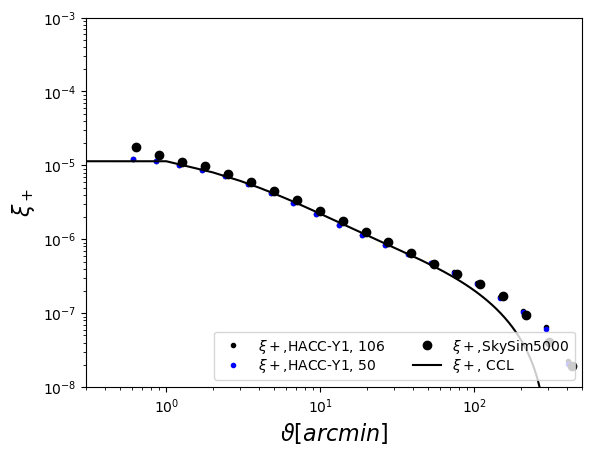

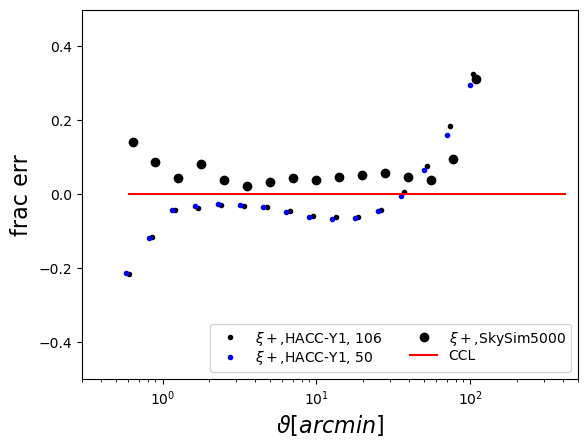

Working on bins 1 2


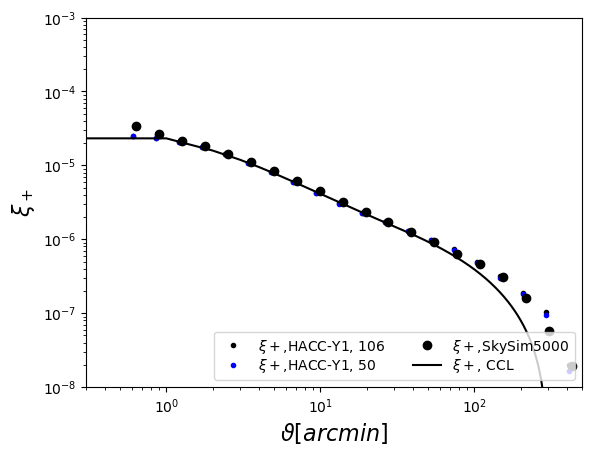

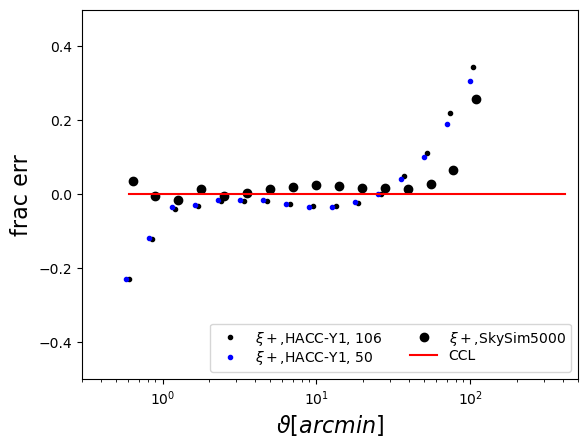

Working on bins 1 3


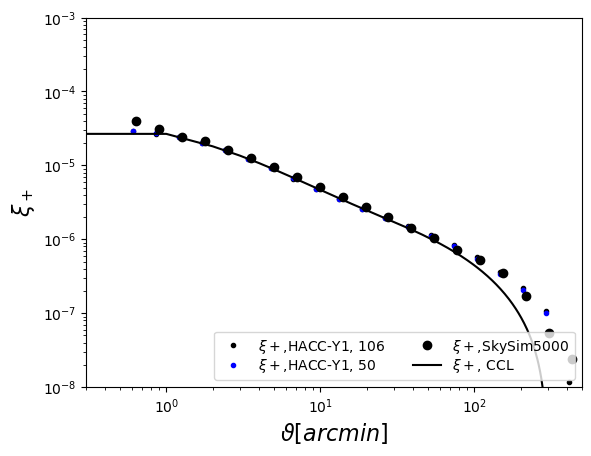

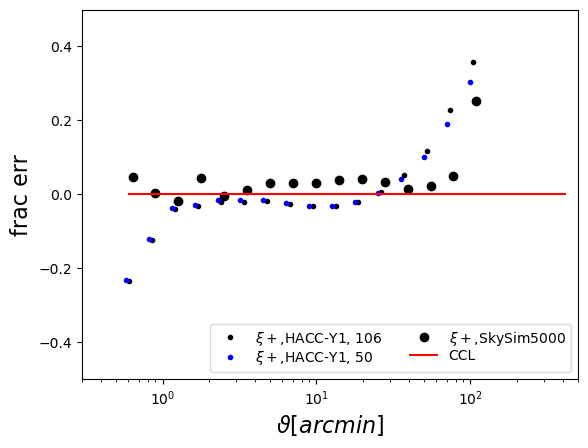

Working on bins 2 2


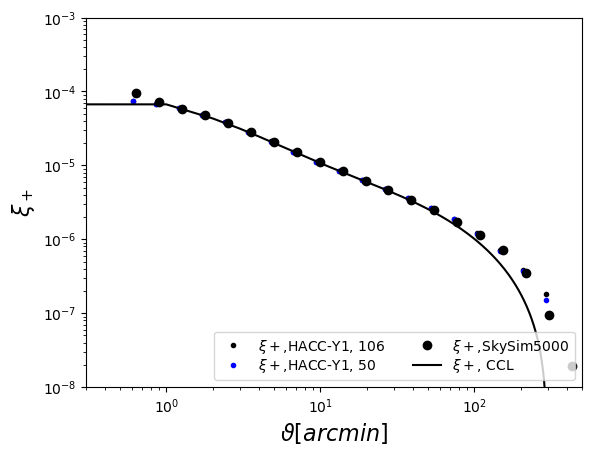

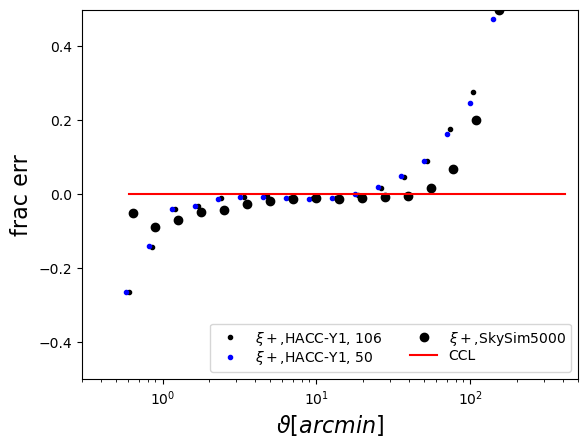

Working on bins 2 3


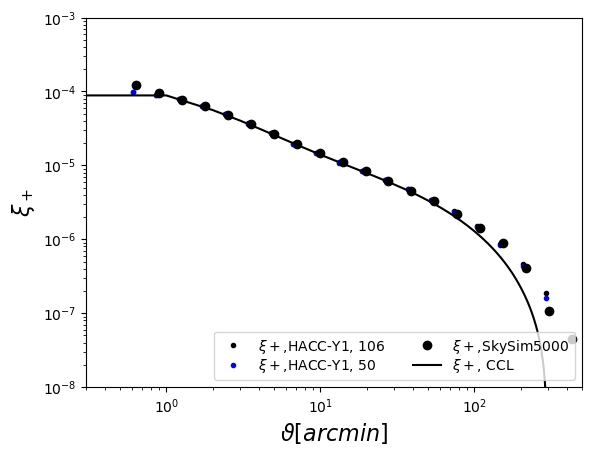

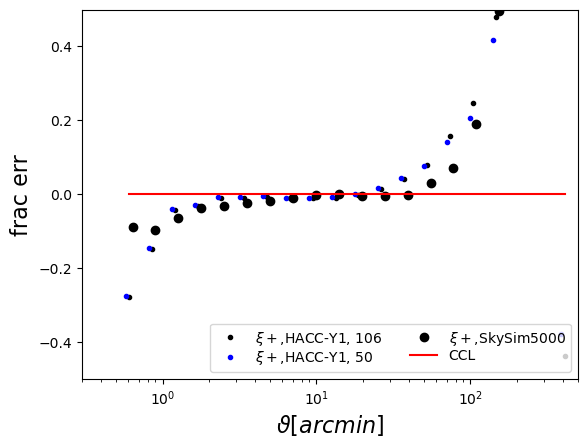

Working on bins 3 3


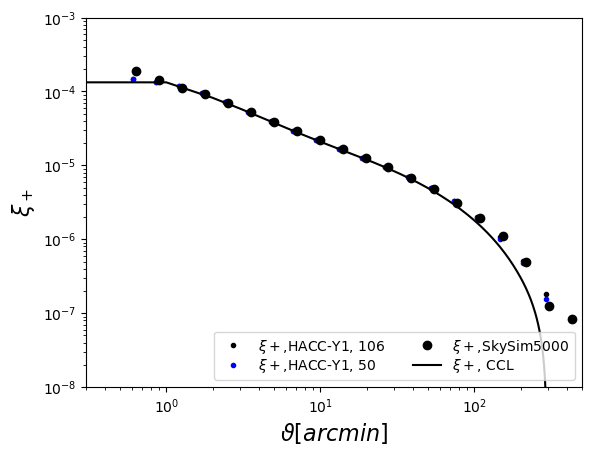

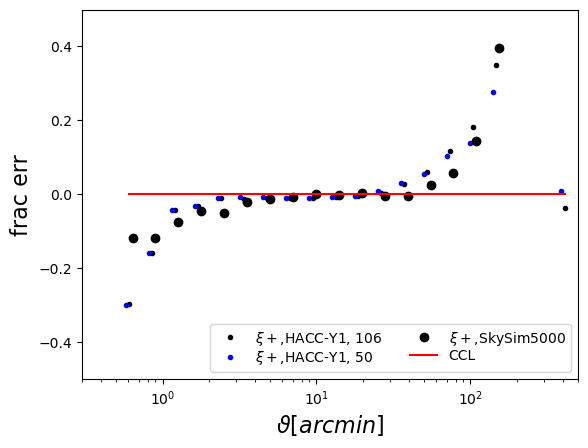

In [33]:
# Load the CCL predictions:
hdul = fits.open('theory/CCL/theo_prediction_1.0_0.0_0.0.fits')
data=hdul[1].data
NO_IA_plus_CCL=data['NO IA+'] # Xi + (no ia)
NO_IA_minus_CCL=data['NO IA-'] # Xi - (no ia)
z_combination=data['bin_comb']  #redshift bin combination 
theta_CCL=data['theta']            # Angular separation(s) in arcmin

# Initialize:

Nbins=int(20)
Ntomo=int(4)
Ntomocomb = int(Ntomo*(Ntomo+1)/2);
counter=0
xip_106=np.empty([Nbins,Ntomocomb])
xim_106=np.empty([Nbins,Ntomocomb])
xip_50=np.empty([Nbins,Ntomocomb])
xim_50=np.empty([Nbins,Ntomocomb])
xip_SkySim=np.empty([Nbins,Ntomocomb])
xim_SkySim=np.empty([Nbins,Ntomocomb])

#Define the correlator, for plotting:
gg = treecorr.GGCorrelation(nbins = Nbins, min_sep=0.5, max_sep=475.5, sep_units='arcmin',bin_slop=0.01)

for bin1 in np.arange(Ntomo)+1:
    for bin2 in range (bin1,Ntomo+1):


        print('Working on bins', bin1, bin2)

        # Get Treecorr measurements

        #--------------------
        # pure cosmic shear:
        #SkySim5000, random positions:
        #filename=path_treecorr+'cross_correlation_tomo{}_{}'.format(bin1,bin2)
        #SkySim5000, linear bias
        #filename=path_treecorr+'cross_correlation_tomo{}_{}_linear_bias'.format(bin1,bin2)
        filename=path_treecorr+'cross_correlation_0.06GpAM_tomo{}_{}_linear_bias'.format(bin1,bin2)
        #filename=path_treecorr+'cross_correlation_0.6GpAM_tomo{}_{}_linear_bias'.format(bin1,bin2)
        gg.read(filename)
        xip_SkySim[:,counter]=gg.xip
        xim_SkySim[:,counter]=gg.xim

        

        #HACC-Y1 random positions
        filename106=path_treecorr_HACCY1+'cross_correlation_tomo{}_{}_nshells106'.format(bin1,bin2)
        gg.read(filename106)
        xip_106[:,counter]=gg.xip
        xim_106[:,counter]=gg.xim

        filename50=path_treecorr_HACCY1+'cross_correlation_tomo{}_{}_nshells50'.format(bin1,bin2)
        gg.read(filename50)
        xip_50[:,counter]=gg.xip
        xim_50[:,counter]=gg.xim

        theta=gg.meanr     

        #Get theory (CCL)
        # Find the right column:
        for tomo in range(0,15):
            if(z_combination[tomo][0]==bin2 and z_combination[tomo][1]==bin1 ):
                #print(z_combination[tomo][0], z_combination[tomo][1])
                #print("Will use column",tomo)
                break

        theta_CCL=data['theta']
        theta_CCL=theta_CCL[0,:]
        xip_CCL=NO_IA_plus_CCL[tomo,:]
        xim_CCL=NO_IA_minus_CCL[tomo,:]

        #----------
        #plot xi+:
        # Sims:
        plt.plot(theta, xip_106[:,counter], 'k.', label='$\\xi+$,HACC-Y1, 106')
        plt.plot(theta, xip_50[:,counter], 'b.', label='$\\xi+$,HACC-Y1, 50')
        plt.plot(theta*1.05, xip_SkySim[:,counter], 'ko', label='$\\xi+$,SkySim5000')
        #CCL:
        plt.plot(theta_CCL, xip_CCL, 'k-', label='$\\xi+$, CCL')

        plt.loglog()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('$\\xi_+$', fontsize=16)
        plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
        plt.xlim([0.3, 500])
        plt.ylim([1e-8, 1e-3])
        plt.show()

        plt.plot(theta, xip_106[:,counter]/np.interp(theta, theta_CCL, xip_CCL) - 1, 'k.', label='$\\xi+$,HACC-Y1, 106')
        plt.plot(theta*0.95, xip_50[:,counter]/np.interp(theta, theta_CCL, xip_CCL) - 1, 'b.', label='$\\xi+$,HACC-Y1, 50')
        plt.plot(theta*1.05, xip_SkySim[:,counter]/np.interp(theta, theta_CCL, xip_CCL) - 1, 'ko', label='$\\xi+$,SkySim5000')
        plt.plot(theta, theta/theta - 1, 'r-', label='CCL')

        plt.semilogx()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('frac err', fontsize=16)
        plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
        plt.xlim([0.3, 500])
        plt.ylim([-0.5, 0.5])
        plt.show()

        